Imports

In [1]:
import pandas
import numpy as np
import pydotplus

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree
from six import StringIO  
from IPython.display import Image
from sklearn import metrics

Load CSV

In [2]:
moje_data = pandas.read_csv("/content/drive/MyDrive/Škola/ZS/zaverecny_projekt/drug200.csv", sep=",")
moje_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


###Preprocessing

Label Encoding¶

In [3]:
categories = ['Sex', 'BP', 'Cholesterol', 'Drug']

for label in categories: 
  labelEncoder = LabelEncoder()
  moje_data[label] = labelEncoder.fit_transform(moje_data[label])

###Training and Testing

*y = drug type, x = other properties*

In [4]:
y = moje_data['Drug']
X = moje_data.drop('Drug', axis = 1 )

Create training and testing data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Fit decision tree model

In [6]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X,y)
print("training",  metrics.accuracy_score(y_train, clf.predict(X_train)) * 100)
print("testing", metrics.accuracy_score(y_test, clf.predict(X_test))* 100)

training 100.0
testing 100.0


Display decision tree model

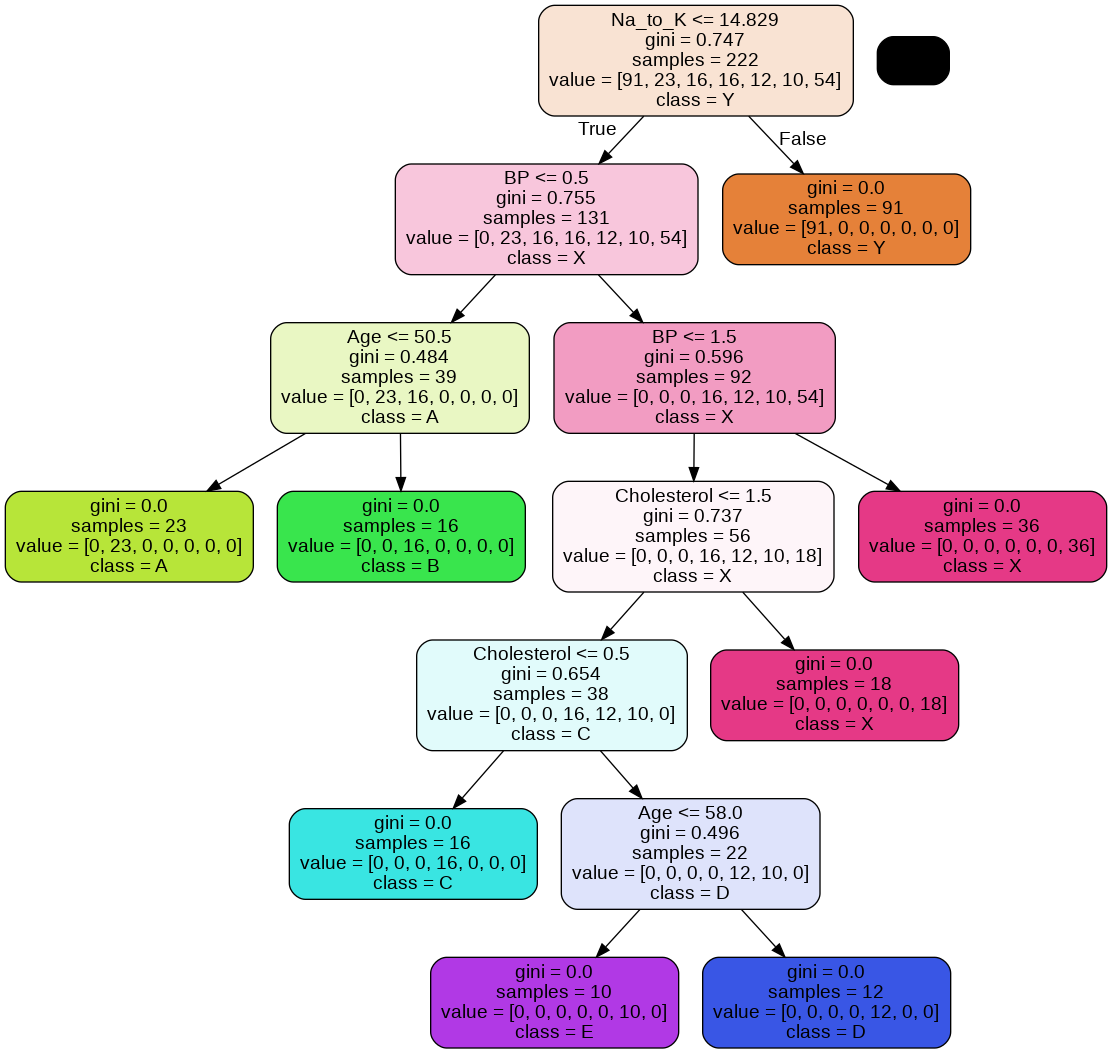

In [7]:
feature_namess = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
Drug = ['Y', 'A', 'B', 'C', 'D', 'E', 'X' ]

dot_data = StringIO()
export_graphviz(clf, 
                out_file = dot_data,
                feature_names = feature_namess[:5],
                class_names = Drug[:7],
                rounded = True, 
                filled = True,
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('skuska.png')
Image(graph.create_png())

Create rules from decision tree

In [8]:
def tree_to_code(tree, feature_names, Y):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent], tree_.value[node])
    recurse(0, 1, 0)

In [9]:
tree_to_code(clf, feature_namess, y_train)

1 ) Na_to_K <= 14.828500270843506  & BP <= 0.5  & Age <= 50.5  [[ 0. 23.  0.  0.  0.  0.  0.]]
2 ) Na_to_K <= 14.828500270843506  & BP <= 0.5  & Age > 50.5 [[ 0.  0. 16.  0.  0.  0.  0.]]
3 ) Na_to_K <= 14.828500270843506  & BP > 0.5 & BP <= 1.5  & Cholesterol <= 1.5  & Cholesterol <= 0.5  [[ 0.  0.  0. 16.  0.  0.  0.]]
4 ) Na_to_K <= 14.828500270843506  & BP > 0.5 & BP <= 1.5  & Cholesterol <= 1.5  & Cholesterol > 0.5 & Age <= 58.0  [[ 0.  0.  0.  0.  0. 10.  0.]]
5 ) Na_to_K <= 14.828500270843506  & BP > 0.5 & BP <= 1.5  & Cholesterol <= 1.5  & Cholesterol > 0.5 & Age > 58.0 [[ 0.  0.  0.  0. 12.  0.  0.]]
6 ) Na_to_K <= 14.828500270843506  & BP > 0.5 & BP <= 1.5  & Cholesterol > 1.5 [[ 0.  0.  0.  0.  0.  0. 18.]]
7 ) Na_to_K <= 14.828500270843506  & BP > 0.5 & BP > 1.5 [[ 0.  0.  0.  0.  0.  0. 36.]]
8 ) Na_to_K > 14.828500270843506 [[91.  0.  0.  0.  0.  0.  0.]]
